# Imports

In [1]:
import numpy as np
import pickle
import seaborn as sns
from model import modelSolve,gini
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman'],'size':16})
rc('text', usetex=True)

In [2]:
data_path = './data/'

In [3]:
Lambda = pickle.load(open(data_path+'Lambda_matrix.p','rb'))
Mu = pickle.load(open(data_path+'Mu_matrix.p','rb'))
Leaders = pickle.load(open(data_path+'Leaders.p','rb'))
N,S = Lambda.shape
P_estim = pickle.load(open(data_path+'p_estim_matrix.p','rb')) # initial values
P_theo = pickle.load(open(data_path+'p_theo_matrix.p','rb')) # initial values theo
Affiliations = pickle.load(open(data_path+'Affiliations.p','rb'))
party_id = pickle.load(open(data_path+'party_id.p','rb'))

In [4]:
Brange = np.array([.02,.04,.06,.08,.1])

# Gini

In [ ]:
nodiff = True # no diffusion?

0.02 0
0.04 0
0.06 0
0.08 0
0.1 0


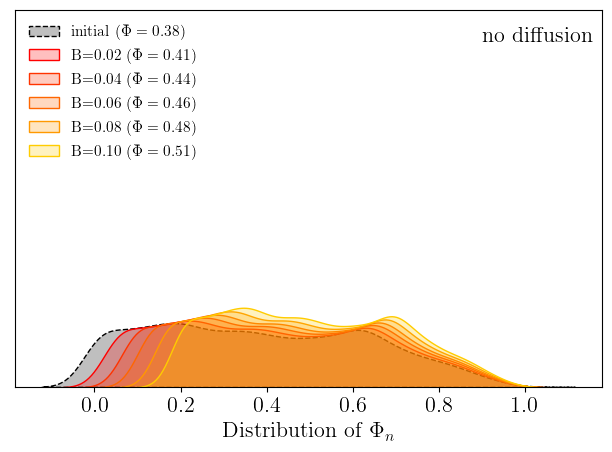

In [5]:
fig,ax = plt.subplots()
bw = 1 # density bandwidth
cmap = plt.get_cmap('autumn').copy()
mini,maxi = Brange.min(), Brange.max()
Brange_norm = Brange# for colors

gini_estim = [gini(P_estim[n]) for n in range(N)]
avg = np.mean(gini_estim)
sns.kdeplot(ax=ax, x=gini_estim, bw_adjust=bw, color='black', fill=True, ls='--', 
            label=fr'initial $(\bar\Phi={avg:.2f})$')
    
for k,B in enumerate(Brange):
    res_path = 'results/'
    if nodiff:
        P = pickle.load(open(res_path+f'Pnodiff_{B}.p','rb'))
    else:
        P = pickle.load(open(res_path+f'p_{B}.p','rb'))
    gini_optim = [gini(P[n]) for n in range(N)]
    avg = np.mean(gini_optim)
    color = cmap(k/len(Brange))
    sns.kdeplot(ax=ax, x=gini_optim, bw_adjust=bw, color=color, fill=True, label=fr'B={B:.2f} $(\bar\Phi={avg:.2f})$')

ax.set_xlabel(r'Distribution of $\Phi_n$')
ax.set_ylabel('')
ax.set_ylim(0,8.2)
ax.set_yticks([])
    
ax.legend(loc='upper left',fontsize=11,frameon=False)
plt.tight_layout()
if nodiff:
    plt.text(s='no diffusion', x=.9, y=7.5)
plt.show()
plt.close()

# Echo

In [6]:
echo_estim, echo_theo = list() , list()
for n in range(N):
    s = Affiliations[n]
    if len(s)==2:
        s = [party_id[(s[0],)],party_id[(s[1],)]]
    else:
        s = party_id[s]
    echo_estim.append(P_estim[n,s].mean())
    echo_theo.append(P_theo[n,s].mean())

In [ ]:
nodiff = True # no diffusion?

0.02 417
0.04 425
0.06 430
0.08 430
0.1 435


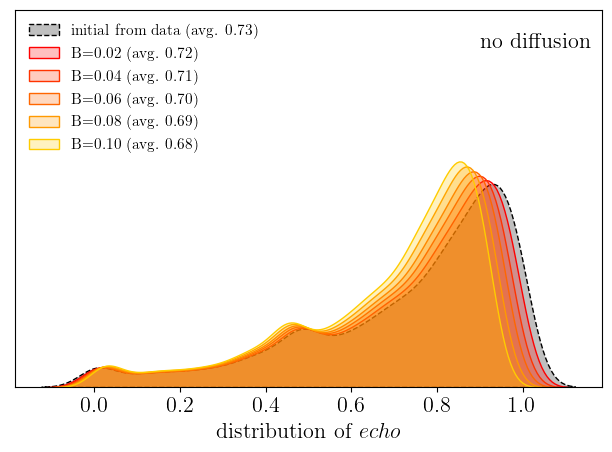

In [7]:
Brange = np.array([.02,.04,.06,.08,.1])
fig,ax = plt.subplots()
bw = 1 # density bandwidth
cmap = plt.get_cmap('autumn').copy()
mini,maxi = Brange.min(), Brange.max()
Brange_norm = Brange # for colors

avg = np.mean(echo_estim)
sns.kdeplot(ax=ax, x=echo_estim, bw_adjust=bw, color='black', fill=True, 
            ls='--', label=fr'initial from data (avg. ${avg:.2f})$')

for k,B in enumerate(Brange):
    res_path = 'results/'
    if nodiff:
        P = pickle.load(open(res_path+f'Pnodiff_{B}.p','rb'))
    else:
        P = pickle.load(open(res_path+f'p_{B}.p','rb'))
    echo_optim = list()
    for n in range(N):
        s = Affiliations[n]
        if len(s)==2: s = [party_id[(s[0],)],party_id[(s[1],)]]
        else: s = party_id[s]
        echo_optim.append(P[n,s].mean())
    avg = np.mean(echo_optim)
    color = cmap(k/len(Brange))
    sns.kdeplot(ax=ax, x=echo_optim, bw_adjust=bw, color=color, fill=True, 
                label=fr'B={B:.2f} (avg. ${avg:.2f})$')

ax.set_xlabel(r'distribution of $echo$')
ax.set_ylabel('')
ax.set_ylim(0,5)
ax.set_yticks([])
    
ax.legend(loc='upper left',fontsize=11,frameon=False)
plt.tight_layout()
if nodiff:
    plt.text(s='no diffusion', x=.9, y=4.5)
plt.show()
plt.close()

# Nu

Get avg and std nu for each party for each budget.

In [8]:
Brange = np.array([.02,.04,.06,.08,.1])#,.2,.5])
avg_nu = {s:np.array([]) for s in range(S)}
std_nu = {s:np.array([]) for s in range(S)}

for B in Brange:
    res_path = 'results/'
    nu = pickle.load(open(res_path+f'nu_{B}.p','rb'))
    nu = nu / nu.sum(axis=1).reshape(-1,1)
    for s in range(S):
        avg_nu[s] = np.append(avg_nu[s], nu[:,s].mean())  
        std_nu[s] = np.append(std_nu[s], nu[:,s].std(ddof=1))  

Plot.

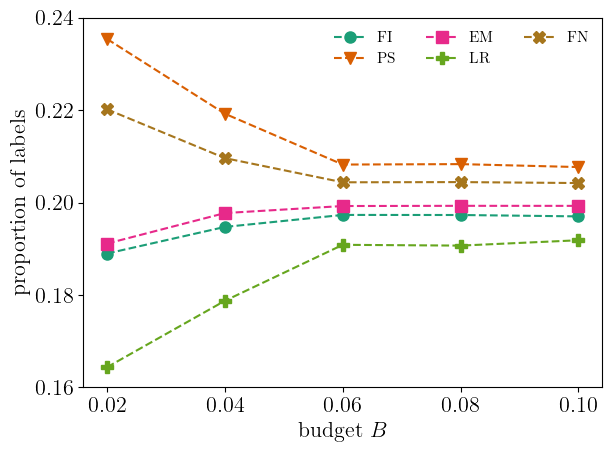

In [9]:
plt.figure()
id2party = ('FI','PS','EM','LR','FN')
cmap = plt.get_cmap('Dark2').copy()
mark = 'ovsPX'

for s in range(S):
    c = cmap(s/S)
    plt.plot(Brange, avg_nu[s], ls='--', color=c, marker=mark[s], markersize=8, label=id2party[s])
    plt.text

plt.xticks(Brange)
plt.legend(fontsize=11,frameon=False,labelspacing=.5,ncol=3)
plt.yticks([.16,.18,.2,.22,.24])
plt.xlabel('budget $B$')
plt.ylabel('proportion of labels')
plt.tight_layout()
plt.show()
plt.close()

# Rel change in phi and echo

Relative change in $\bar\Phi$ and $echo$ per unit of budget.

In [10]:
Brange = np.array([.02,.04,.06,.08,.1])#,.2])

In [11]:
gini_estim = [gini(P_estim[n]) for n in range(N)]
avg_estim = np.mean(gini_estim)

In [12]:
echo_estim = 0
for n in range(N):
    s = Affiliations[n]
    if len(s)==2:
        s = [party_id[(s[0],)],party_id[(s[1],)]]
    else:
        s = party_id[s]
    echo_estim += P_estim[n,s].mean()
echo_estim /= N

In [13]:
relChange = {'echo':list(), 'phi':list()}
for B in Brange:
    res_path = 'results/'
    P = pickle.load(open(res_path+f'p_{B}.p','rb'))
    echo_optim = 0
    for n in range(N):
        s = Affiliations[n]
        if len(s)==2: s = [party_id[(s[0],)],party_id[(s[1],)]]
        else: s = party_id[s]
        echo_optim += P[n,s].mean()
    echo_optim /= N
    relChange['echo'].append(np.abs(echo_optim-echo_estim)/echo_estim/B)
    gini_optim = np.array([gini(P[n]) for n in range(N)])
    relChange['phi'].append(np.abs(gini_optim.mean()-avg_estim)/avg_estim/B)

Plot.

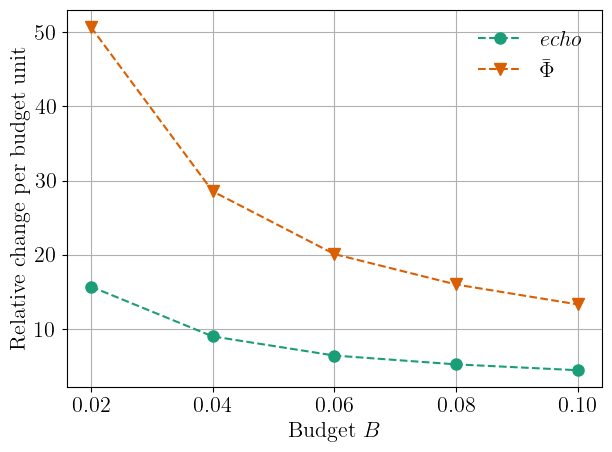

In [14]:
plt.figure()
cmap = plt.get_cmap('Dark2').copy()

plt.plot(Brange, relChange['echo'], ls='--', marker='o', markersize=8, color=cmap(0), label=r'$echo$')
plt.plot(Brange, relChange['phi'], ls='--', marker='v', markersize=8, color=cmap(1), label=r'$\bar\Phi$')

plt.legend(loc='upper right', frameon=False)
plt.xlabel(r'Budget $B$')
plt.ylabel('Relative change per budget unit')

plt.grid()
plt.tight_layout()
plt.show()
plt.close()